## Librerías

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

from analytics_tools3 import freq_discrete,plot_event_rate,plot_ks,plot_roc_curve,iv_report
%matplotlib inline 

## Lectura de datos 

In [2]:
df = pd.read_csv('Datos/TSC_churn_telecom.txt')

In [3]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [4]:
df.shape

(2801, 14)

## Clasificación de variables 

In [5]:
var_disc = [v for v in df.columns if v[:2]=='C_']
var_cont = [v for v in df.columns if v[:2]=='V_']
obj = 'TARGET'

## Exploratorio Rápido 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff43c03e810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff439a98ed0>]], dtype=object)

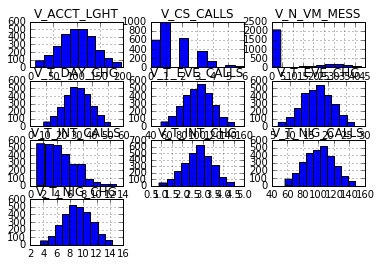

In [6]:
df[var_cont].hist()

In [7]:
df[var_cont].corr()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS
V_ACCT_LGHT,1.000000,0.006403,0.010144,0.038824,-0.001538,0.002904,-0.018335,0.024117,0.018412,-0.012671
V_N_VM_MESS,0.006403,1.000000,-0.000774,-0.010961,0.019215,-0.000553,-0.001205,0.011003,0.005651,-0.009471
V_T_DAY_CHG,0.010144,-0.000774,1.000000,0.010303,0.005383,0.008111,0.002601,0.002464,-0.001028,-0.013518
V_T_EVE_CALLS,0.038824,-0.010961,0.010303,1.000000,-0.007616,0.007311,0.012856,0.000585,-0.018310,-0.015075
V_T_EVE_CHG,-0.001538,0.019215,0.005383,-0.007616,1.000000,-0.012306,-0.014571,0.020250,-0.000887,-0.030214
V_T_NIG_CALLS,0.002904,-0.000553,0.008111,0.007311,-0.012306,1.000000,0.011997,-0.002452,0.002729,-0.015318
V_T_NIG_CHG,-0.018335,-0.001205,0.002601,0.012856,-0.014571,0.011997,1.000000,0.002556,-0.027299,-0.027155
V_T_INT_CALLS,0.024117,0.011003,0.002464,0.000585,0.020250,-0.002452,0.002556,1.000000,-0.008221,-0.003557
V_T_INT_CHG,0.018412,0.005651,-0.001028,-0.018310,-0.000887,0.002729,-0.027299,-0.008221,1.000000,-0.009003
V_CS_CALLS,-0.012671,-0.009471,-0.013518,-0.015075,-0.030214,-0.015318,-0.027155,-0.003557,-0.009003,1.000000


In [8]:
X = df[var_cont].copy()
y = df[obj]

In [9]:
scaler = StandardScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X),columns=var_cont)
pca = PCA()
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p%d'%x for x in range(1,len(var_cont)+1)])

In [10]:
pca.explained_variance_ratio_.cumsum()

array([ 0.10674718,  0.21214068,  0.31576573,  0.41756091,  0.51726562,
        0.61637638,  0.71467246,  0.81221384,  0.90644007,  1.        ])

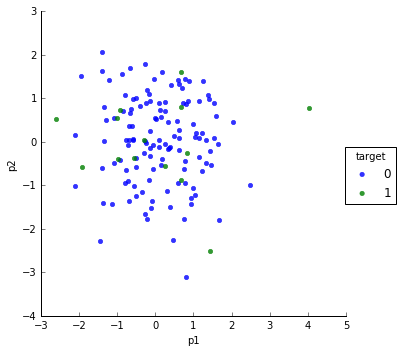

In [11]:
Xp['target'] = y

sns.lmplot(data=Xp.sample(frac=0.05),x='p1',y='p2',hue='target',fit_reg=False)

In [12]:
%%time
mds = MDS(n_components=2)
Xm = pd.DataFrame(mds.fit_transform(Xs),columns=['d1','d2'])

CPU times: user 5min 28s, sys: 9min 35s, total: 15min 3s
Wall time: 3min 56s


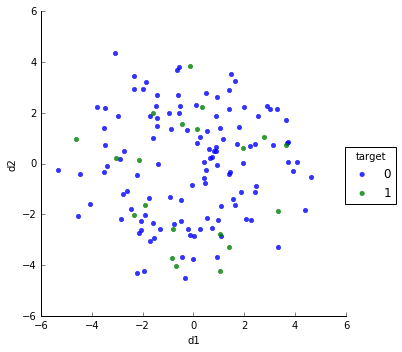

In [13]:
Xm['target'] = y
sns.lmplot(data=Xm.sample(frac=0.05),x='d1',y='d2',hue='target',fit_reg=False)

## Partición de entrenamiento

In [14]:
Xt,Xv,yt,yv =train_test_split(X,y,train_size=0.7)
for d in [Xt,Xv,yt,yv]:
    print d.shape

(1960, 10)
(841, 10)
(1960,)
(841,)


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
def metricas(model,Xt,Xv,yt,yv):
    print roc_auc_score(y_score=model.predict_proba(Xt)[:,1],y_true=yt)
    print roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv)
    print accuracy_score(y_pred=model.predict(Xt),y_true=yt)
    print accuracy_score(y_pred=model.predict(Xv),y_true=yv)
    print confusion_matrix(y_pred=model.predict(Xt),y_true=yt)
    print confusion_matrix(y_pred=model.predict(Xv),y_true=yv)

## Árboles de decisión 

In [16]:
model = DecisionTreeClassifier()
model.fit(Xt,yt)
metricas(model,Xt,Xv,yt,yv)

1.0
0.730741806514
1.0
0.864447086801
[[1688    0]
 [   0  272]]
[[668  66]
 [ 48  59]]


In [17]:
param_grid = dict(criterion=['gini','entropy'],
                 max_depth=range(1,11),
                 min_samples_split = range(100,210,10)
                 )

In [18]:
model = DecisionTreeClassifier()
grid = GridSearchCV(cv=10,n_jobs=-1,scoring='roc_auc',
                    estimator=model,
                    param_grid=param_grid)

In [19]:
%%time 
grid.fit(X,y)

CPU times: user 4.96 s, sys: 464 ms, total: 5.43 s
Wall time: 14.3 s


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [20]:
print grid.best_estimator_
print grid.best_params_
print grid.best_score_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=160,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'min_samples_split': 160, 'criterion': 'gini', 'max_depth': 8}
0.840377668479


In [21]:
model = grid.best_estimator_
model.fit(Xt,yt)
metricas(model,Xt,Xv,yt,yv)

0.881263939225
0.825714940538
0.887244897959
0.868014268728
[[1555  133]
 [  88  184]]
[[665  69]
 [ 42  65]]


## Regresión Logística 

In [22]:
model =LogisticRegression()
model.fit(Xt,yt)
metricas(model,Xt,Xv,yt,yv)

0.772797166853
0.703914028878
0.862755102041
0.871581450654
[[1669   19]
 [ 250   22]]
[[724  10]
 [ 98   9]]


In [32]:
aux= df[['C_IP',obj,'ID']].copy()
aux = aux.pivot_table(aggfunc='count',columns=obj,fill_value=0,
                      index='C_IP',values='ID')
aux.to_clipboard()

In [35]:
aux = df[['V_ACCT_LGHT','ID',obj]].copy()

In [37]:
aux['V_ACCT_LGHT'] = pd.cut(aux.V_ACCT_LGHT,bins=5).astype(str)

In [38]:
freq_discrete(aux,'V_ACCT_LGHT')

Frequency distribution table for variable: V_ACCT_LGHT


                Freq       Pct  Accum Freq  Accum Pct
(85.2, 121.8]   1005  0.358800        1005   0.358800
(48.6, 85.2]     712  0.254195        1717   0.612995
(121.8, 158.4]   639  0.228133        2356   0.841128
(11.817, 48.6]   246  0.087826        2602   0.928954
(158.4, 195.0]   199  0.071046        2801   1.000000




In [39]:
aux = aux.pivot_table(aggfunc='count',columns=obj,fill_value=0,
                      index='V_ACCT_LGHT',values='ID')
aux.to_clipboard()

In [71]:
model  = MLPClassifier()
model.fit(Xt,yt)
metricas(model,Xt,Xv,yt,yv)

0.70792967661
0.618681402633
0.861224489796
0.86920332937
[[1665   23]
 [ 249   23]]
[[725   9]
 [101   6]]


array([ 0.96693136,  0.03778319,  0.02613805,  0.96837784])